# Regresión con Random Forest

In [1]:
from numpy import mean

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, RepeatedKFold

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Empleamos la función make_regression para generar datos sintéticos
#  con una variable Y y, una sola variable X
X, y = make_regression(n_samples     = 50, 
                       n_features    = 1, 
                       n_informative = 15, 
                       noise         = 20, 
                       random_state  = 2
                      )

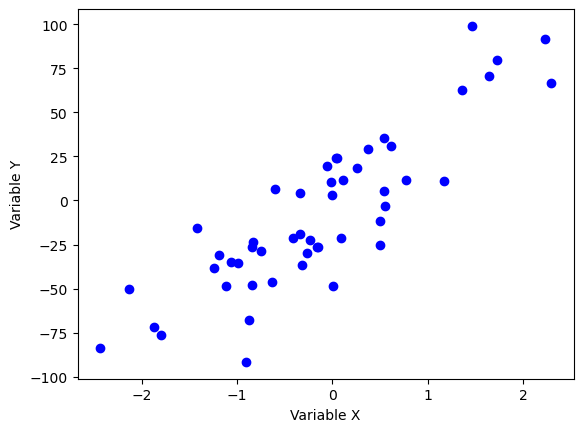

In [3]:
plt.scatter(X, y, color = 'blue')   
plt.xlabel('Variable X') 
plt.ylabel('Variable Y') 
plt.show()

En el siguiente código se muestra como realizar una validación pero esta vez sin optimizar los parámetros del modelo. Para optimizar los parámetros se utilizaba GridSearchCV, que prueba todas las combinaciones de los parámetros (GridSearch) validándolos con validación cruzada (CV de Cross Validation). En este caso simplemente se validan los parámetros por defecto con la función RepeatedKFold

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [4]:
# Defino un modelo
model = RandomForestRegressor()

In [5]:
model

RandomForestRegressor()

In [6]:
# Evaluamos el modelo mediante validación cruzada
cv = RepeatedKFold(n_splits  = 10, # Se remuestrea 10 veces
                   n_repeats = 3   # Se repite el proceso 3 veces
                  ) # Por lo tanto, se generan 30 muestras

n_scores = cross_val_score(model, X, y, 
                           scoring = 'neg_mean_squared_error', # Métrica https://scikit-learn.org/stable/modules/model_evaluation.html
                           cv = cv,     # Validación cruzada
                           n_jobs = -1, # Disponibilidad de cores 
                           error_score='raise')

In [7]:
n_scores

array([ -195.30061592,  -536.47967997,  -452.04947179,  -723.86844506,
        -728.68246464,  -865.59065329,  -337.82116886,  -193.65513573,
        -942.82403804,  -737.90234599,  -355.79239645,  -232.95569881,
       -1092.53942003,  -230.24857844,  -637.37915584,  -222.96457113,
        -553.61545075,  -717.50747986, -1289.66505116,  -530.13197434,
        -552.54887627,  -553.7624189 ,  -412.41533501,  -948.5062157 ,
        -183.26771519,  -746.95871428, -1798.54351941,  -472.55986731,
        -599.47775881,  -495.32047785])

## ¿Porqué tengo valores de métricas negativos?

En bibliotecas como Scikit-Learn devuelve el MSE (Error Cuadrático Medio) (o cualquier otra métrica que podamos seleccionar) negativo cuando usamos el parámetro `scoring='neg_mean_squared_error'` por convención (científcamente hablando) y para que sea consistente con la forma en que se manejan las métricas en Scikit-Learn.

Scikit-Learn utiliza una convención donde intenta maximizar la métrica de puntuación durante la validación cruzada. Esto es adecuado para algoritmos de aprendizaje automático en los que un valor más alto de puntuación es mejor. Sin embargo, el MSE es una métrica que mide el error, y en este caso, un valor más bajo es mejor. Para hacer que la convención de maximización funcione con el MSE, simplemente se cambia el signo de la métrica.

Entonces, cuando obtengamos un MSE negativo de cross_val_score, en realidad estás obteniendo el valor negativo del MSE, que es positivo en términos reales. Para obtener el valor del MSE real, puedes simplemente multiplicar el resultado por -1.

Por ejemplo, si obtienes un resultado de -0.123, el valor real del MSE sería 0.123.

Esto se hace para mantener la coherencia con la convención de que un valor de puntuación más alto es mejor, incluso cuando se trata de métricas de error que deberían ser minimizadas.

In [9]:
1-mean(n_scores)

612.3444898274472

In [10]:
# Obtengo una métrica de rendimiento
print('Error cuadrático medio MSE: ', round(1-mean(n_scores),2))

Error cuadrático medio MSE:  612.34


In [11]:
# Generamos datos de test
X_grid = np.arange(min(X), max(X), 0.01)                
X_grid = X_grid.reshape((len(X_grid), 1)) 

In [12]:
# Ajusto el modelo a los datos
model.fit(X,y)
y_prediccion = model.predict(X_grid)

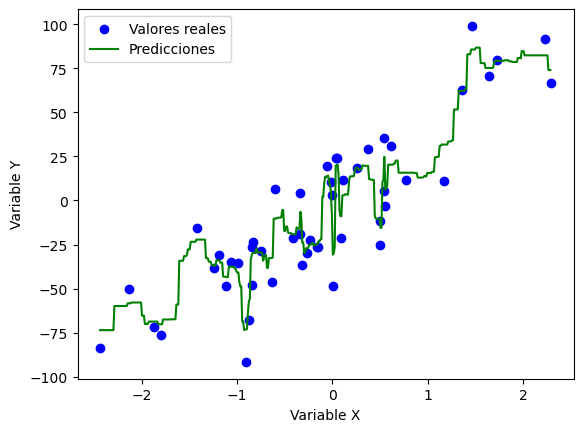

In [13]:
# Visualización de los resultados del Random Forest Regressor
plt.scatter(X, y, color = 'blue', label="Valores reales")   
plt.plot(X_grid, y_prediccion, color = 'green', label="Predicciones")  
plt.xlabel('Variable X') 
plt.ylabel('Variable Y') 
plt.legend()
plt.show()